# Dados Utilizados

Utilizamos dados da billboard e do spotify para fazer uma análise das músicas mais populares.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Tratando os dados

Começamos selecionando as colunas que vamos usar e depois filtrando as linhas que possuem dados faltantes.

In [2]:
songs = pd.read_csv('../dataset/billboard_2000_2018_spotify_lyrics.csv',
                 encoding='iso-8859-1', na_values='unknown')

songs = songs[['date', 'title', 'artist', 'peak_pos', 'last_pos', 'weeks', 'rank', 'genre', 'energy', 'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'time_signature', 'danceability', 'key','duration_ms', 'loudness', 'valence', 'mode']]

#transformando todos os títulos de música e nomes de artista em minúsculo
songs['title'] = songs['title'].str.lower()
songs['artist'] = songs['artist'].str.lower()

#removendo músicas duplicadas
songs.drop_duplicates(subset=['title', 'artist'], keep='first', inplace = True)

# Removendo na
songs = songs.dropna()

Podemos observar que os gêneros não estão processáveis. Como faremos uma análise de gênero, será importante que eles estejam padronizados. Assim, vamos realizar um one-hot encoding dos gêneros mais relevantes.

In [3]:
#transforma gêneros para formato de lista
genres_list = []

for value in songs['genre'].values:
    value = value.replace("u'", "")
    value = value.replace("'", "")
    value = value.replace("[", "")
    value = value.replace("]", "")
    
    song_genres = value.split(", ")
    genres = []
    
    for genre in song_genres:
        if genre or genre.strip():
            genres.append(genre)
            
    
    genres_list.append(genres)

songs_with_genres = songs.copy()
    
songs_with_genres['genre'] = genres_list
songs_with_genres

,date,title,artist,peak_pos,last_pos,weeks,rank,genre,energy,liveness,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
1,6/21/18,all girls are the same,juice wrld,41,49,5,41,[rap],0.529,0.0856,...,0.3070,0.076900,0.000335,4.0,0.671,0.0,165820.0,-7.226,0.2030,1.0
2,6/21/18,all mine,kanye west,11,11,2,31,"[pop rap, rap]",0.308,0.0933,...,0.3380,0.125000,0.000000,4.0,0.925,11.0,145507.0,-6.562,0.2650,0.0
5,6/21/18,back to you,selena gomez,22,31,5,22,"[dance pop, pop, post-teen pop]",0.724,0.1200,...,0.0486,0.094500,0.000002,4.0,0.601,6.0,207905.0,-4.856,0.5080,1.0
7,6/21/18,be careful,cardi b,11,25,11,23,"[pop, rap]",0.568,0.0952,...,0.4110,0.025600,0.000000,4.0,0.820,6.0,210787.0,-8.230,0.5350,0.0
8,6/21/18,beautiful crazy,luke combs,58,77,4,93,"[contemporary country, country road]",0.402,0.0928,...,0.0262,0.676000,0.000000,4.0,0.552,11.0,193200.0,-7.431,0.3820,1.0
9,6/21/18,better now,post malone,7,34,7,20,"[pop, rap]",0.563,0.1360,...,0.0454,0.354000,0.000000,4.0,0.680,10.0,231267.0,-5.843,0.3740,1.0
11,6/21/18,boo'd up,ella mai,6,6,11,7,"[dance pop, indie r&b, pop, r&b, urban contemp...",0.779,0.0780,...,0.0531,0.086200,0.000000,4.0,0.561,10.0,256064.0,-5.107,0.2350,0.0
12,6/21/18,call out my name,the weeknd,4,52,11,54,"[canadian pop, pop, rap]",0.599,0.3270,...,0.0369,0.211000,0.000000,3.0,0.449,1.0,228373.0,-4.892,0.1650,1.0
13,6/21/18,chun-li,nicki minaj,10,46,10,43,"[dance pop, hip pop, pop, pop rap, rap]",0.766,0.1070,...,0.3840,0.307000,0.000014,4.0,0.643,6.0,191606.0,-4.788,0.4630,0.0
14,6/21/18,cudi montage,kids see ghosts,69,0,1,69,"[hip hop, pop, pop rap, rap]",0.504,0.1210,...,0.0321,0.401000,0.000001,4.0,0.729,8.0,197001.0,-6.784,0.3050,0.0


In [4]:
#recupera gêneros únicos

def get_unique_genres(songs):
    unique_genres = {}
      
    for genres in songs['genre']:
        for genre in genres:
            if genre in unique_genres:
                unique_genres[genre] += 1
            else:
                unique_genres[genre] = 1
    
    unique_genres = pd.DataFrame.from_dict(unique_genres, orient='index')
    unique_genres.sort_values(by=0, ascending=False, inplace=True)
    unique_genres.reset_index(level=0, inplace=True)
    unique_genres.columns = ['genre', 'quantity']
    
    return unique_genres

unique_genres = get_unique_genres(songs_with_genres)
unique_genres

,genre,quantity
0,pop,2945
1,dance pop,2574
2,pop rap,2110
3,rap,1725
4,post-teen pop,1496
5,hip hop,1283
6,r&b,1277
7,contemporary country,1212
8,southern hip hop,1132
9,country,1130


Fazendo a análise dos gêneros, podemos observar que muitos deles tem poucas músicas no Top 100. Isso é mostrado no histograma:

(array([364.,   9.,   3.,   6.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([1.0000e+00, 2.9540e+02, 5.8980e+02, 8.8420e+02, 1.1786e+03,
        1.4730e+03, 1.7674e+03, 2.0618e+03, 2.3562e+03, 2.6506e+03,
        2.9450e+03]),
 <a list of 10 Patch objects>)

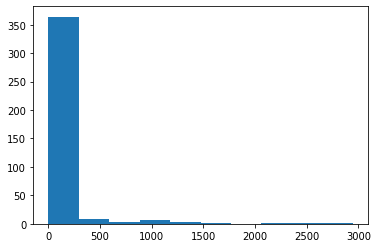

In [5]:
plt.hist(unique_genres['quantity'])

Assim, vamos criar uma lista apenas com os gêneros relevantes a partir de um número arbitrário, definido como pelo menos 10% da quantidade original de músicas.

In [6]:
def get_relevant_genres(songs, unique_genres):
    unique_genres.sort_values(by='quantity', ascending=False, inplace=True)
    return unique_genres[unique_genres['quantity'] >= songs.shape[0]*0.10]

relevant_genres = get_relevant_genres(songs_with_genres, unique_genres)
relevant_genres

,genre,quantity
0,pop,2945
1,dance pop,2574
2,pop rap,2110
3,rap,1725
4,post-teen pop,1496
5,hip hop,1283
6,r&b,1277
7,contemporary country,1212
8,southern hip hop,1132
9,country,1130


De posse dos nossos gêneros relevantes, conseguimos fazer o one-hot encoding da tabela.

(array([4., 5., 1., 1., 0., 1., 0., 0., 1., 1.]),
 array([ 921. , 1123.4, 1325.8, 1528.2, 1730.6, 1933. , 2135.4, 2337.8,
        2540.2, 2742.6, 2945. ]),
 <a list of 10 Patch objects>)

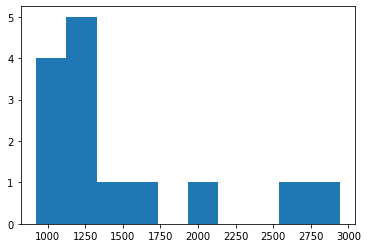

In [7]:
plt.hist(relevant_genres['quantity'])

Agora os gêneros parecem estar mais equilibrados.

In [8]:
#retorna lista de one-encoding por gênero
def genre_one_hot_encoding(songs_with_genres, genre):
    one_hot_encoding = songs_with_genres.genre.map(set([genre]).issubset)
    return list(one_hot_encoding.map({False:0, True:1}))

In [9]:
#itera sobre os gêneros adicionando colunas ao nosso dataframe de músicas para tratá-los como dados classificatórios
def one_hot_encoding(songs_with_genres, relevant_genres):  
    songs_one_hot_encoding = songs_with_genres

    for i in range(relevant_genres.shape[0]):
        songs_one_hot_encoding.insert(i+4, relevant_genres['genre'][i], genre_one_hot_encoding(songs_with_genres, relevant_genres['genre'][i]))

    return songs_one_hot_encoding 

songs_one_hot_encoding = one_hot_encoding(songs_with_genres, relevant_genres)
songs_one_hot_encoding

,date,title,artist,peak_pos,pop,dance pop,pop rap,rap,post-teen pop,hip hop,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
1,6/21/18,all girls are the same,juice wrld,41,0,0,0,1,0,0,...,0.3070,0.076900,0.000335,4.0,0.671,0.0,165820.0,-7.226,0.2030,1.0
2,6/21/18,all mine,kanye west,11,0,0,1,1,0,0,...,0.3380,0.125000,0.000000,4.0,0.925,11.0,145507.0,-6.562,0.2650,0.0
5,6/21/18,back to you,selena gomez,22,1,1,0,0,1,0,...,0.0486,0.094500,0.000002,4.0,0.601,6.0,207905.0,-4.856,0.5080,1.0
7,6/21/18,be careful,cardi b,11,1,0,0,1,0,0,...,0.4110,0.025600,0.000000,4.0,0.820,6.0,210787.0,-8.230,0.5350,0.0
8,6/21/18,beautiful crazy,luke combs,58,0,0,0,0,0,0,...,0.0262,0.676000,0.000000,4.0,0.552,11.0,193200.0,-7.431,0.3820,1.0
9,6/21/18,better now,post malone,7,1,0,0,1,0,0,...,0.0454,0.354000,0.000000,4.0,0.680,10.0,231267.0,-5.843,0.3740,1.0
11,6/21/18,boo'd up,ella mai,6,1,1,0,0,0,0,...,0.0531,0.086200,0.000000,4.0,0.561,10.0,256064.0,-5.107,0.2350,0.0
12,6/21/18,call out my name,the weeknd,4,1,0,0,1,0,0,...,0.0369,0.211000,0.000000,3.0,0.449,1.0,228373.0,-4.892,0.1650,1.0
13,6/21/18,chun-li,nicki minaj,10,1,1,1,1,0,0,...,0.3840,0.307000,0.000014,4.0,0.643,6.0,191606.0,-4.788,0.4630,0.0
14,6/21/18,cudi montage,kids see ghosts,69,1,0,1,1,0,1,...,0.0321,0.401000,0.000001,4.0,0.729,8.0,197001.0,-6.784,0.3050,0.0


## Explorando os dados

Agora, conseguimos realizar operações sobre o nosso dataset para visualizar estatísticas por gênero.

In [10]:
#agrupa por gênero para tirar estatísticas

def group_by_genre(relevant_genres, songs_one_hot_encoding):
    genre_stats = {}
    for i in range(relevant_genres.shape[0]):
        genres = relevant_genres.iloc[i]['genre']
        df_genres = songs_one_hot_encoding[['peak_pos', 'weeks', 'rank', genres]]
        group_genre = df_genres[df_genres[genres] == True]
        group_genre = group_genre.mean()[['peak_pos', 'weeks', 'rank']]

        genre_stats[genres] = group_genre

    return pd.DataFrame.from_dict(genre_stats, orient='index')

genre_stats = group_by_genre(relevant_genres, songs_one_hot_encoding)
genre_stats

,peak_pos,weeks,rank
contemporary country,50.299505,15.967822,82.117987
country,49.975221,16.169912,82.679646
country road,50.584699,16.113843,82.539162
dance pop,40.780886,14.259518,72.769619
hip hop,46.874513,12.737334,77.037412
hip pop,40.401075,16.301075,75.610753
pop,43.577250,13.594567,72.752801
pop rap,44.524171,14.124171,75.250237
post-teen pop,42.266711,12.546123,71.719920
r&b,39.548160,16.174628,74.144871


In [11]:
genre_stats.sort_values(by='peak_pos')

,peak_pos,weeks,rank
r&b,39.548160,16.174628,74.144871
urban contemporary,39.831349,16.146825,75.245040
hip pop,40.401075,16.301075,75.610753
dance pop,40.780886,14.259518,72.769619
post-teen pop,42.266711,12.546123,71.719920
pop,43.577250,13.594567,72.752801
pop rap,44.524171,14.124171,75.250237
hip hop,46.874513,12.737334,77.037412
rap,47.384348,12.702609,76.191304
southern hip hop,48.575972,13.553887,77.661661


Assim, ao ordenar o agrupamento, podemos ver que r&b, urban contemporary, dance pop, hip hop e post-teen pop atingem em média posições superiores em relação a contemporary country, country road, post-grunge, trap music e modern country rock.

Agora, precisamos analisar se essas informações são ou não determinísticos. Vamos começar analisando a amostra das músicas que atingiram as 10 primeiras posições do ranking.

In [12]:
top_10 = songs_one_hot_encoding[songs_one_hot_encoding['peak_pos'] < 11]

top_10_genre_stats = group_by_genre(relevant_genres, top_10)
top_10_genre_stats

,peak_pos,weeks,rank
contemporary country,5.800000,35.950000,58.550000
country,5.888889,34.666667,59.555556
country road,5.666667,42.166667,50.583333
dance pop,4.518400,26.675200,50.550400
hip hop,4.515152,24.709957,51.225108
hip pop,4.324074,26.050926,49.574074
pop,4.530159,27.965079,49.996825
pop rap,4.550588,26.364706,49.049412
post-teen pop,4.532934,27.098802,52.032934
r&b,4.258258,26.546547,49.855856


In [13]:
top_10_genre_stats.sort_values(by='peak_pos')

,peak_pos,weeks,rank
urban contemporary,4.189189,25.942085,49.741313
r&b,4.258258,26.546547,49.855856
hip pop,4.324074,26.050926,49.574074
hip hop,4.515152,24.709957,51.225108
dance pop,4.518400,26.675200,50.550400
pop,4.530159,27.965079,49.996825
post-teen pop,4.532934,27.098802,52.032934
pop rap,4.550588,26.364706,49.049412
rap,4.707483,24.768707,49.707483
southern hip hop,4.767568,25.718919,49.059459


Observamos aqui certa semelhança com o dataframe quando tratado em sua interidade. Músicas que contém o estilo r&b, urban contemporary e hip hop também atingiram posições mais altas no ranking.

Assim, vamos analisar com maior propriedade se as músicas que atingem as posições mais altas realmente tem gêneros em comum ou se isso pode ser explicado pelo acaso nos testes de hipótese e intervalo de confiança.

Vamos fazer a mesma análise agora para os atributos do spotify definidos para as músicas.

In [14]:
spotify_attributes = ['energy', 'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'time_signature', 'danceability', 'key', 'duration_ms', 'loudness', 'valence', 'mode']

songs_with_attributes = songs[spotify_attributes]

In [15]:
#agrupa por atributos para tirar estatísticas

def group_by_attribute(songs_with_attributes):
    return pd.DataFrame(songs_with_attributes.mean())

attribute_stats = group_by_attribute(songs_with_attributes)
attribute_stats

,0
energy,0.693821
liveness,0.185588
tempo,122.174024
speechiness,0.103958
acousticness,0.165550
instrumentalness,0.013020
time_signature,3.974322
danceability,0.624660
key,5.251498
duration_ms,231931.086733


Temos aqui as médias de todas as características do dataset. Agora, vamos refazer o teste apenas para o top 10.

In [16]:
top_10_attributes = songs[songs['peak_pos'] < 11]
top_10_attributes = top_10_attributes[spotify_attributes]
top_10_attribute_stats = group_by_attribute(top_10_attributes)
top_10_attribute_stats

,0
energy,0.693862
liveness,0.180998
tempo,119.706870
speechiness,0.113852
acousticness,0.137331
instrumentalness,0.010689
time_signature,3.994324
danceability,0.668859
key,5.103122
duration_ms,237962.465468


In [17]:
attribute_stats - top_10_attribute_stats

,0
energy,-0.000041
liveness,0.004589
tempo,2.467153
speechiness,-0.009894
acousticness,0.028219
instrumentalness,0.002331
time_signature,-0.020001
danceability,-0.044199
key,0.148376
duration_ms,-6031.378735


A diferença entre o dataset em geral e apenas os atributos das músicas que atingiram o top 10 não parecem muito diferentes. Exploraremos mais no teste de hipótese.

In [18]:
#salvando os dados tratados
songs_with_genres.to_csv('../dataset/songs_with_genre.csv', index=False)
songs_one_hot_encoding.to_csv('../dataset/songs_one_hot_encoding.csv', index=False)
relevant_genres.to_csv('../dataset/genres_relevant.csv', index=False)